<a href="https://colab.research.google.com/github/HEMANTHSAINI/colab/blob/MASTER/pro%3D117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load=files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [2]:
import pandas as pd 
import csv

df = pd.read_csv("BankNote_Authentication.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [4]:
from sklearn.model_selection import train_test_split
variance = df["variance"]
target = df["class"]
variancetrain, varianceTest, targetTrain, targetTest = train_test_split(variance, target, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.linear_model import LogisticRegression
import numpy as np

x = np.reshape(variancetrain.ravel(), (len(variancetrain), 1))
y = np.reshape(targetTrain.ravel(), (len(targetTrain), 1))

classifier = LogisticRegression(random_state = 0)
classifier.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
xTest = np.reshape(varianceTest.ravel(), (len(varianceTest), 1))
yTest = np.reshape(targetTest.ravel(), (len(targetTest), 1))

prediction = classifier.predict(xTest)
predictvalues = []

for i in prediction:
  if i == 0:
    predictvalues.append("NO")
  
  else:
    predictvalues.append("Yes")

actualValues = []

for i in yTest.ravel():
  if i == 0:
    actualValues.append("NO")
  
  else:
    actualValues.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'NO')]

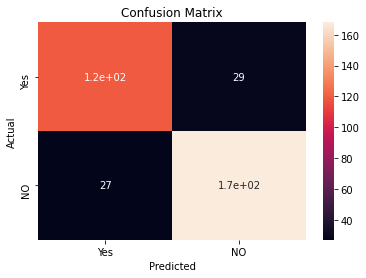

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = ["Yes", "NO"]
cm = confusion_matrix(actualValues, predictvalues, labels)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [8]:
accuracy=(1.2e+02 + 1.7e+02)/(1.2e+02 + 1.7e02 + 29 + 27)
print(accuracy)

0.838150289017341


In [9]:
variance = df[["variance", "skewness", "curtosis", "entropy"]]
target = df["class"]
variancetrain, varianceTest, targetTrain, targetTest = train_test_split(variance, target, test_size = 0.25, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
factorTrain = sc.fit_transform(variancetrain)
factorTest = sc.transform(varianceTest)

classifier = LogisticRegression(random_state = 0)
classifier.fit(factorTrain, targetTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
prediction = classifier.predict(factorTest)
predictvalues = []

for i in prediction:
  if i == 0:
    predictvalues.append("NO")
  
  else:
    predictvalues.append("Yes")

actualValues = []

for i in targetTest.ravel():
  if i == 0:
    actualValues.append("NO")
  
  else:
    actualValues.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'NO')]

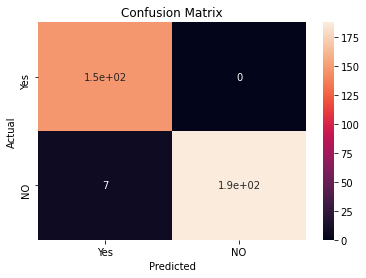

In [12]:
labels = ["Yes", "NO"]
cm = confusion_matrix(actualValues, predictvalues, labels)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [13]:
accuracy = ((1.5e+02 + 1.9e02)/(1.5e+02 + 1.9e02 + 0 + 7))*100
print(accuracy)

97.98270893371757
